<a href="https://colab.research.google.com/github/Dr-Carlos-Villasenor/PatternRecognition/blob/main/PR01_03_sklearn_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Reconocimeinto de Patrones
##Dr. Carlos Vilaseñor
##Regresión lineal con scikit-learn

*scikit-learn* es una biblioteca de Machine Learning muy popular en estos días, implementa los modelos y algoritmos más populares en el estado del arte de manera eficiente. A continuación se desarrolla un ejemplo de regresión lineal simple.

Primeramente se importan las paqueterias:

In [ ]:
!pip install scikit-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Ahora se tiene que leer el conjunto de datos por medio de pandas

In [5]:
#!wget 'https://raw.githubusercontent.com/Dr-Carlos-Villasenor/PatternRecognition/main/Dataset/countries.csv'
data = pd.read_csv('countries.csv')
print(data.head())

       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106


Recortamos los valores de Mexico y mostramos un gráfico del año contra la esperanza de vida

    country  year          pop continent  lifeExp     gdpPercap
984  Mexico  1952   30144317.0  Americas   50.789   3478.125529
985  Mexico  1957   35015548.0  Americas   55.190   4131.546641
986  Mexico  1962   41121485.0  Americas   58.299   4581.609385
987  Mexico  1967   47995559.0  Americas   60.110   5754.733883
988  Mexico  1972   55984294.0  Americas   62.361   6809.406690
989  Mexico  1977   63759976.0  Americas   65.032   7674.929108
990  Mexico  1982   71640904.0  Americas   67.405   9611.147541
991  Mexico  1987   80122492.0  Americas   69.498   8688.156003
992  Mexico  1992   88111030.0  Americas   71.455   9472.384295
993  Mexico  1997   95895146.0  Americas   73.670   9767.297530
994  Mexico  2002  102479927.0  Americas   74.902  10742.440530
995  Mexico  2007  108700891.0  Americas   76.195  11977.574960


<Axes: xlabel='year', ylabel='lifeExp'>

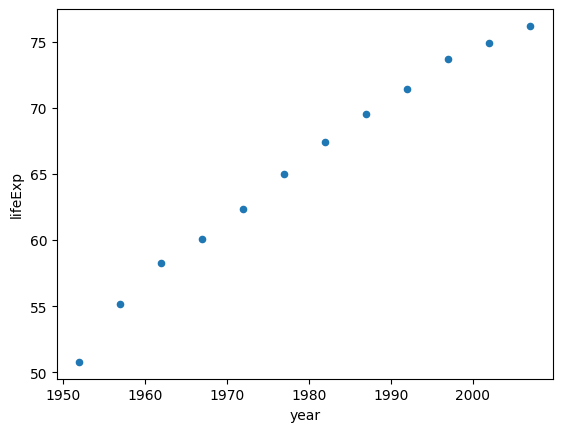

In [6]:
data_mex = data[data.country == 'Mexico']
print(data_mex)
data_mex.plot.scatter(x='year',y='lifeExp')

Para este ejemplo la variable 'year' será nuestra variable independiente y la variable 'lifeExp' sera nuestra variable dependiente.

In [7]:
x = np.asarray(data_mex[['year']])
y = np.asarray(data_mex[['lifeExp']])

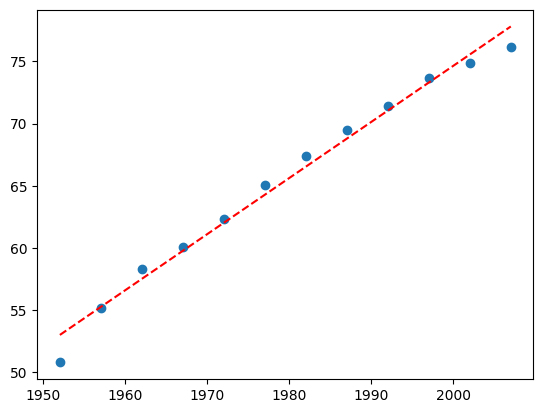

In [8]:
model = linear_model.LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
plt.scatter(x,y)
plt.plot(x,y_pred,'--r')

Ya que tenemos el modelo ajustado podemor hacer predicciones (extrapolaciones o interpolaciones)

In [9]:
model.predict([[2022]])

array([[84.57781935]])

### Métricas de regresión
Pero, ¿Cómo podemos determinar si el modelo que tenemos se ajusta bien a los datos o no?.

Se puede, por ejemplo, determinar el error entre los datos esperados y los predichos de la siguiente manera:

In [10]:
# Error en cada predicción
y-y_pred

array([[-2.21637179],
       [-0.07054662],
       [ 0.78327855],
       [ 0.33910373],
       [ 0.3349289 ],
       [ 0.75075408],
       [ 0.86857925],
       [ 0.70640443],
       [ 0.4082296 ],
       [ 0.36805478],
       [-0.65512005],
       [-1.61729487]])

In [11]:
# Pero solo nos importa la magnitud de dicho error
abs(y-y_pred)

array([[2.21637179],
       [0.07054662],
       [0.78327855],
       [0.33910373],
       [0.3349289 ],
       [0.75075408],
       [0.86857925],
       [0.70640443],
       [0.4082296 ],
       [0.36805478],
       [0.65512005],
       [1.61729487]])

#### Métricas de errores usados en Regresión
Error Absoluto Medio (MAE de las siglas en inglés Mean Absolute Error)

$$\text{MAE}(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|.$$

In [12]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,y_pred)

0.7598888888889034

Error Cuadrático Medio (MSE de las siglas en inglés Mean Squared Error)

$$\text{MSE}(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2$$

In [13]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_pred)

0.9101653580031027

Error Mediano Absoluto (MedAE de las siglas en inglés Median Absolute Error)

$$\text{MedAE}(y, \hat{y}) = \text{median}(\mid y_1 - \hat{y}_1 \mid, \ldots, \mid y_n - \hat{y}_n \mid)$$

In [14]:
from sklearn.metrics import median_absolute_error
mean_absolute_error(y,y_pred)

0.7598888888889034

Pese a todas estás metricas un favorito en el Aprendizaje Automático es el coheficiente $R^2$ tambien llamado Coeficiente de Determinación
$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \bar{y})^2}$$

donde $\bar{y} =  \frac{1}{n} \sum_{i=1}^n y_i$

Una de las virtudes de este coeficiente es que una predicción perfecta ofrece un $R^2=1$ y un modelo que no toma en cuenta la entrada para la prediccion obtendrá un $R^2$ negativo

In [15]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9852044388728112

Muy parecido al coeficiente $R^2$ es el coeficiente de de explicación de la varianza (Explained variance score), en el cual el mejor posible es 1.0 y valores menores son peores.

$$\text{EVS}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$$



In [16]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y, y_pred)

0.9852044388728112

Sin embargo, ninguna de estás metricas nos dice que tan confiable es nuestra predicción sobre datos de entrada nunca antes vistos!!! Esto lo arreglaremos la próxima sesión